In [1]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [3]:
dataset.load_all_data(color=['white'], size=['single'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed white key: 19083
  # of unpressed white key: 57362


IntProgress(value=0, max=5000)

In testset: 
  # of pressed white key: 10831
  # of unpressed white key: 23450


IntProgress(value=0, max=2993)

In valset: 
  # of pressed white key: 5090
  # of unpressed white key: 12058


In [4]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=114724)

(2, 106, 21, 3)
0 1
Samples from X_test: 


IntProgress(value=0, max=34281)

(2, 106, 21, 3)
0 0
Samples from X_val: 


IntProgress(value=0, max=17148)

(2, 106, 21, 3)
1 0


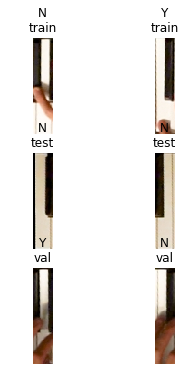

In [6]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb, _ in dataset.data_batch(type=_type, size='single', color='white', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [7]:
wmodel = models.get_white_key_model(channels)
wmodel.train(dataset, batch_size=32, size='single', color='white',
             concatenate=concat,
             num_epochs=200,
             weight_decay=0.1,
             max_num=-1,
             learning_rate=1e-3,
             decay_every=10,
             decay_by=0.5,
             best_path='keypress_recognition/best_white_model.tar',
             current_path='keypress_recognition/current_white.tar',
             method=0)

Epoch 1/200


IntProgress(value=0, max=114724)

train Loss: 0.4963
[[50879  6164]
 [ 6497 51212]]
Precision: 0.89
Recall   : 0.89
Accuracy : 0.89


IntProgress(value=0, max=17148)

val Loss: 0.3510
[[9290  112]
 [2771 4979]]
Precision: 0.64
Recall   : 0.98
Accuracy : 0.83
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 2/200


IntProgress(value=0, max=114724)

train Loss: 0.4373
[[51269  5651]
 [ 6107 51725]]
Precision: 0.89
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17148)

val Loss: 0.2550
[[11333  1176]
 [  728  3915]]
Precision: 0.84
Recall   : 0.77
Accuracy : 0.89
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 3/200


IntProgress(value=0, max=114724)

train Loss: 0.4339
[[51571  5652]
 [ 5805 51724]]
Precision: 0.90
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17148)

val Loss: 0.3763
[[9528  274]
 [2533 4817]]
Precision: 0.66
Recall   : 0.95
Accuracy : 0.84
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 4/200


IntProgress(value=0, max=114724)

train Loss: 0.4304
[[51749  5700]
 [ 5627 51676]]
Precision: 0.90
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17148)

val Loss: 0.4830
[[8450  212]
 [3611 4879]]
Precision: 0.57
Recall   : 0.96
Accuracy : 0.78
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 5/200


IntProgress(value=0, max=114724)

train Loss: 0.4289
[[51522  5788]
 [ 5854 51588]]
Precision: 0.90
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17148)

val Loss: 0.3893
[[8990  106]
 [3071 4985]]
Precision: 0.62
Recall   : 0.98
Accuracy : 0.81
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 6/200


IntProgress(value=0, max=114724)

train Loss: 0.4330
[[51496  5585]
 [ 5880 51791]]
Precision: 0.90
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17148)

val Loss: 0.2827
[[11515  1611]
 [  546  3480]]
Precision: 0.86
Recall   : 0.68
Accuracy : 0.87
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 7/200


IntProgress(value=0, max=114724)

train Loss: 0.4289
[[51834  5704]
 [ 5542 51672]]
Precision: 0.90
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17148)

val Loss: 0.5561
[[7681   83]
 [4380 5008]]
Precision: 0.53
Recall   : 0.98
Accuracy : 0.74
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 8/200


IntProgress(value=0, max=114724)

train Loss: 0.4259
[[51301  5772]
 [ 6075 51604]]
Precision: 0.89
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17148)

val Loss: 0.3037
[[11539   803]
 [  522  4288]]
Precision: 0.89
Recall   : 0.84
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 9/200


IntProgress(value=0, max=114724)

train Loss: 0.4275
[[51072  5830]
 [ 6304 51546]]
Precision: 0.89
Recall   : 0.90
Accuracy : 0.89


IntProgress(value=0, max=17148)

val Loss: 0.3904
[[9224  280]
 [2837 4811]]
Precision: 0.63
Recall   : 0.95
Accuracy : 0.82
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 10/200


IntProgress(value=0, max=114724)

train Loss: 0.3792
[[53362  4561]
 [ 4014 52815]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.2839
[[10180   168]
 [ 1881  4923]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.88
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 11/200


IntProgress(value=0, max=114724)

train Loss: 0.3738
[[53301  4523]
 [ 4075 52853]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.3107
[[9938  185]
 [2123 4906]]
Precision: 0.70
Recall   : 0.96
Accuracy : 0.87
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 12/200


IntProgress(value=0, max=114724)

train Loss: 0.3737
[[53189  4507]
 [ 4187 52869]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.92


IntProgress(value=0, max=17148)

val Loss: 0.3954
[[8981  121]
 [3080 4970]]
Precision: 0.62
Recall   : 0.98
Accuracy : 0.81
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 13/200


IntProgress(value=0, max=114724)

train Loss: 0.3715
[[53282  4412]
 [ 4094 52964]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.2711
[[10464   314]
 [ 1597  4777]]
Precision: 0.75
Recall   : 0.94
Accuracy : 0.89
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 14/200


IntProgress(value=0, max=114724)

train Loss: 0.3717
[[53449  4489]
 [ 3927 52887]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.3237
[[9583  112]
 [2478 4979]]
Precision: 0.67
Recall   : 0.98
Accuracy : 0.85
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 15/200


IntProgress(value=0, max=114724)

train Loss: 0.3714
[[53293  4476]
 [ 4083 52900]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.3609
[[9550  234]
 [2511 4857]]
Precision: 0.66
Recall   : 0.95
Accuracy : 0.84
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 16/200


IntProgress(value=0, max=114724)

train Loss: 0.3680
[[53349  4424]
 [ 4027 52952]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.5864
[[7592   11]
 [4469 5080]]
Precision: 0.53
Recall   : 1.00
Accuracy : 0.74
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 17/200


IntProgress(value=0, max=114724)

train Loss: 0.3663
[[53386  4428]
 [ 3990 52948]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.2270
[[11283   739]
 [  778  4352]]
Precision: 0.85
Recall   : 0.85
Accuracy : 0.91
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 18/200


IntProgress(value=0, max=114724)

train Loss: 0.3687
[[53328  4516]
 [ 4048 52860]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.2638
[[10476   330]
 [ 1585  4761]]
Precision: 0.75
Recall   : 0.94
Accuracy : 0.89
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 19/200


IntProgress(value=0, max=114724)

train Loss: 0.3674
[[53440  4357]
 [ 3936 53019]]
Precision: 0.93
Recall   : 0.92
Accuracy : 0.93


IntProgress(value=0, max=17148)

val Loss: 0.2151
[[11951  1405]
 [  110  3686]]
Precision: 0.97
Recall   : 0.72
Accuracy : 0.91
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 20/200


IntProgress(value=0, max=114724)

train Loss: 0.3339
[[54313  3824]
 [ 3063 53552]]
Precision: 0.95
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.2268
[[11038   360]
 [ 1023  4731]]
Precision: 0.82
Recall   : 0.93
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 21/200


IntProgress(value=0, max=114724)

train Loss: 0.3317
[[54337  3834]
 [ 3039 53542]]
Precision: 0.95
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.2375
[[10769   207]
 [ 1292  4884]]
Precision: 0.79
Recall   : 0.96
Accuracy : 0.91
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 22/200


IntProgress(value=0, max=114724)

train Loss: 0.3295
[[54244  3733]
 [ 3132 53643]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.2692
[[10511   143]
 [ 1550  4948]]
Precision: 0.76
Recall   : 0.97
Accuracy : 0.90
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 23/200


IntProgress(value=0, max=114724)

train Loss: 0.3309
[[54201  3739]
 [ 3175 53637]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.2310
[[10580    70]
 [ 1481  5021]]
Precision: 0.77
Recall   : 0.99
Accuracy : 0.91
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 24/200


IntProgress(value=0, max=114724)

train Loss: 0.3262
[[54243  3675]
 [ 3133 53701]]
Precision: 0.94
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.1716
[[11356   203]
 [  705  4888]]
Precision: 0.87
Recall   : 0.96
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 25/200


IntProgress(value=0, max=114724)

train Loss: 0.3273
[[54283  3744]
 [ 3093 53632]]
Precision: 0.95
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.3162
[[10339   693]
 [ 1722  4398]]
Precision: 0.72
Recall   : 0.86
Accuracy : 0.86
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 26/200


IntProgress(value=0, max=114724)

train Loss: 0.3274
[[54210  3667]
 [ 3166 53709]]
Precision: 0.94
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.2177
[[10834   170]
 [ 1227  4921]]
Precision: 0.80
Recall   : 0.97
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 27/200


IntProgress(value=0, max=114724)

train Loss: 0.3261
[[54292  3626]
 [ 3084 53750]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.2449
[[10522   110]
 [ 1539  4981]]
Precision: 0.76
Recall   : 0.98
Accuracy : 0.90
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 28/200


IntProgress(value=0, max=114724)

train Loss: 0.3237
[[54190  3637]
 [ 3186 53739]]
Precision: 0.94
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.1805
[[11359   374]
 [  702  4717]]
Precision: 0.87
Recall   : 0.93
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 29/200


IntProgress(value=0, max=114724)

train Loss: 0.3240
[[54215  3627]
 [ 3161 53749]]
Precision: 0.94
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=17148)

val Loss: 0.1752
[[11667   607]
 [  394  4484]]
Precision: 0.92
Recall   : 0.88
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 30/200


IntProgress(value=0, max=114724)

train Loss: 0.3017
[[54865  3255]
 [ 2511 54121]]
Precision: 0.96
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2474
[[10506   105]
 [ 1555  4986]]
Precision: 0.76
Recall   : 0.98
Accuracy : 0.90
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 31/200


IntProgress(value=0, max=114724)

train Loss: 0.3001
[[54856  3226]
 [ 2520 54150]]
Precision: 0.96
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.1751
[[11581   509]
 [  480  4582]]
Precision: 0.91
Recall   : 0.90
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 32/200


IntProgress(value=0, max=114724)

train Loss: 0.2995
[[54681  3210]
 [ 2695 54166]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.1708
[[11585   337]
 [  476  4754]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 33/200


IntProgress(value=0, max=114724)

train Loss: 0.3005
[[54743  3257]
 [ 2633 54119]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2093
[[11174   402]
 [  887  4689]]
Precision: 0.84
Recall   : 0.92
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 34/200


IntProgress(value=0, max=114724)

train Loss: 0.2999
[[54810  3300]
 [ 2566 54076]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2052
[[11269   399]
 [  792  4692]]
Precision: 0.86
Recall   : 0.92
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 35/200


IntProgress(value=0, max=114724)

train Loss: 0.2990
[[54851  3213]
 [ 2525 54163]]
Precision: 0.96
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.3288
[[9612   40]
 [2449 5051]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.85
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 36/200


IntProgress(value=0, max=114724)

train Loss: 0.2981
[[54756  3310]
 [ 2620 54066]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2029
[[11435   563]
 [  626  4528]]
Precision: 0.88
Recall   : 0.89
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 37/200


IntProgress(value=0, max=114724)

train Loss: 0.2982
[[54824  3193]
 [ 2552 54183]]
Precision: 0.96
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2788
[[10155    80]
 [ 1906  5011]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.88
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 38/200


IntProgress(value=0, max=114724)

train Loss: 0.2954
[[54798  3218]
 [ 2578 54158]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2517
[[10718   348]
 [ 1343  4743]]
Precision: 0.78
Recall   : 0.93
Accuracy : 0.90
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 39/200


IntProgress(value=0, max=114724)

train Loss: 0.2956
[[54796  3123]
 [ 2580 54253]]
Precision: 0.95
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2125
[[11399   623]
 [  662  4468]]
Precision: 0.87
Recall   : 0.88
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 40/200


IntProgress(value=0, max=114724)

train Loss: 0.2818
[[55232  3066]
 [ 2144 54310]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.2011
[[11208   314]
 [  853  4777]]
Precision: 0.85
Recall   : 0.94
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 41/200


IntProgress(value=0, max=114724)

train Loss: 0.2814
[[55178  3012]
 [ 2198 54364]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.1937
[[11308   370]
 [  753  4721]]
Precision: 0.86
Recall   : 0.93
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 42/200


IntProgress(value=0, max=114724)

train Loss: 0.2795
[[55226  3011]
 [ 2150 54365]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1927
[[11315   393]
 [  746  4698]]
Precision: 0.86
Recall   : 0.92
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 43/200


IntProgress(value=0, max=114724)

train Loss: 0.2778
[[55169  2897]
 [ 2207 54479]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1693
[[11556   388]
 [  505  4703]]
Precision: 0.90
Recall   : 0.92
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 44/200


IntProgress(value=0, max=114724)

train Loss: 0.2775
[[55205  2948]
 [ 2171 54428]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1989
[[11241   299]
 [  820  4792]]
Precision: 0.85
Recall   : 0.94
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 45/200


IntProgress(value=0, max=114724)

train Loss: 0.2783
[[55137  2971]
 [ 2239 54405]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17148)

val Loss: 0.1759
[[11428   316]
 [  633  4775]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 46/200


IntProgress(value=0, max=114724)

train Loss: 0.2759
[[55170  2900]
 [ 2206 54476]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1760
[[11528   428]
 [  533  4663]]
Precision: 0.90
Recall   : 0.92
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 47/200


IntProgress(value=0, max=114724)

train Loss: 0.2769
[[55217  2920]
 [ 2159 54456]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.2178
[[11129   413]
 [  932  4678]]
Precision: 0.83
Recall   : 0.92
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 48/200


IntProgress(value=0, max=114724)

train Loss: 0.2763
[[55187  2919]
 [ 2189 54457]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1955
[[11360   382]
 [  701  4709]]
Precision: 0.87
Recall   : 0.92
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 49/200


IntProgress(value=0, max=114724)

train Loss: 0.2757
[[55223  2977]
 [ 2153 54399]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.2005
[[11279   413]
 [  782  4678]]
Precision: 0.86
Recall   : 0.92
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 50/200


IntProgress(value=0, max=114724)

train Loss: 0.2666
[[55411  2835]
 [ 1965 54541]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1928
[[11274   268]
 [  787  4823]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 51/200


IntProgress(value=0, max=114724)

train Loss: 0.2655
[[55378  2825]
 [ 1998 54551]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.2182
[[11285   716]
 [  776  4375]]
Precision: 0.85
Recall   : 0.86
Accuracy : 0.91
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 52/200


IntProgress(value=0, max=114724)

train Loss: 0.2655
[[55411  2815]
 [ 1965 54561]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1980
[[11242   322]
 [  819  4769]]
Precision: 0.85
Recall   : 0.94
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 53/200


IntProgress(value=0, max=114724)

train Loss: 0.2646
[[55395  2821]
 [ 1981 54555]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1793
[[11453   313]
 [  608  4778]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 54/200


IntProgress(value=0, max=114724)

train Loss: 0.2638
[[55419  2783]
 [ 1957 54593]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1671
[[11650   533]
 [  411  4558]]
Precision: 0.92
Recall   : 0.90
Accuracy : 0.94
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 55/200


IntProgress(value=0, max=114724)

train Loss: 0.2636
[[55396  2793]
 [ 1980 54583]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1714
[[11489   319]
 [  572  4772]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 56/200


IntProgress(value=0, max=114724)

train Loss: 0.2634
[[55394  2807]
 [ 1982 54569]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1633
[[11642   420]
 [  419  4671]]
Precision: 0.92
Recall   : 0.92
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 57/200


IntProgress(value=0, max=114724)

train Loss: 0.2643
[[55414  2760]
 [ 1962 54616]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1859
[[11395   345]
 [  666  4746]]
Precision: 0.88
Recall   : 0.93
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 58/200


IntProgress(value=0, max=114724)

train Loss: 0.2633
[[55403  2802]
 [ 1973 54574]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1907
[[11335   321]
 [  726  4770]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 59/200


IntProgress(value=0, max=114724)

train Loss: 0.2630
[[55418  2821]
 [ 1958 54555]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1722
[[11490   335]
 [  571  4756]]
Precision: 0.89
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 60/200


IntProgress(value=0, max=114724)

train Loss: 0.2581
[[55520  2726]
 [ 1856 54650]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1918
[[11260   255]
 [  801  4836]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 61/200


IntProgress(value=0, max=114724)

train Loss: 0.2566
[[55487  2735]
 [ 1889 54641]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1790
[[11435   319]
 [  626  4772]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 62/200


IntProgress(value=0, max=114724)

train Loss: 0.2555
[[55518  2754]
 [ 1858 54622]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1905
[[11311   311]
 [  750  4780]]
Precision: 0.86
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 63/200


IntProgress(value=0, max=114724)

train Loss: 0.2562
[[55515  2736]
 [ 1861 54640]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1759
[[11367   274]
 [  694  4817]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 64/200


IntProgress(value=0, max=114724)

train Loss: 0.2553
[[55547  2708]
 [ 1829 54668]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1627
[[11627   383]
 [  434  4708]]
Precision: 0.92
Recall   : 0.92
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 65/200


IntProgress(value=0, max=114724)

train Loss: 0.2560
[[55531  2775]
 [ 1845 54601]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1714
[[11486   357]
 [  575  4734]]
Precision: 0.89
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 66/200


IntProgress(value=0, max=114724)

train Loss: 0.2554
[[55497  2731]
 [ 1879 54645]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1622
[[11591   351]
 [  470  4740]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 67/200


IntProgress(value=0, max=114724)

train Loss: 0.2557
[[55508  2748]
 [ 1868 54628]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1819
[[11320   239]
 [  741  4852]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 68/200


IntProgress(value=0, max=114724)

train Loss: 0.2547
[[55520  2728]
 [ 1856 54648]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1805
[[11429   349]
 [  632  4742]]
Precision: 0.88
Recall   : 0.93
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 69/200


IntProgress(value=0, max=114724)

train Loss: 0.2560
[[55525  2703]
 [ 1851 54673]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1793
[[11467   342]
 [  594  4749]]
Precision: 0.89
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 70/200


IntProgress(value=0, max=114724)

train Loss: 0.2518
[[55549  2666]
 [ 1827 54710]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1806
[[11394   324]
 [  667  4767]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 71/200


IntProgress(value=0, max=114724)

train Loss: 0.2518
[[55555  2678]
 [ 1821 54698]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1764
[[11410   322]
 [  651  4769]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 72/200


IntProgress(value=0, max=114724)

train Loss: 0.2526
[[55547  2695]
 [ 1829 54681]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1670
[[11532   335]
 [  529  4756]]
Precision: 0.90
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 73/200


IntProgress(value=0, max=114724)

train Loss: 0.2518
[[55564  2713]
 [ 1812 54663]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1743
[[11469   340]
 [  592  4751]]
Precision: 0.89
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 74/200


IntProgress(value=0, max=114724)

train Loss: 0.2511
[[55559  2694]
 [ 1817 54682]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1912
[[11255   278]
 [  806  4813]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 75/200


IntProgress(value=0, max=114724)

train Loss: 0.2514
[[55551  2692]
 [ 1825 54684]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1791
[[11359   260]
 [  702  4831]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 76/200


IntProgress(value=0, max=114724)

train Loss: 0.2510
[[55551  2666]
 [ 1825 54710]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1748
[[11423   293]
 [  638  4798]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 77/200


IntProgress(value=0, max=114724)

train Loss: 0.2508
[[55523  2692]
 [ 1853 54684]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1651
[[11547   317]
 [  514  4774]]
Precision: 0.90
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 78/200


IntProgress(value=0, max=114724)

train Loss: 0.2512
[[55554  2678]
 [ 1822 54698]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1940
[[11223   247]
 [  838  4844]]
Precision: 0.85
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 79/200


IntProgress(value=0, max=114724)

train Loss: 0.2499
[[55566  2677]
 [ 1810 54699]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1685
[[11506   354]
 [  555  4737]]
Precision: 0.90
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 80/200


IntProgress(value=0, max=114724)

train Loss: 0.2489
[[55577  2693]
 [ 1799 54683]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1761
[[11391   262]
 [  670  4829]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 81/200


IntProgress(value=0, max=114724)

train Loss: 0.2496
[[55575  2664]
 [ 1801 54712]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1956
[[11188   250]
 [  873  4841]]
Precision: 0.85
Recall   : 0.95
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 82/200


IntProgress(value=0, max=114724)

train Loss: 0.2490
[[55559  2670]
 [ 1817 54706]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1767
[[11387   279]
 [  674  4812]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 83/200


IntProgress(value=0, max=114724)

train Loss: 0.2489
[[55563  2663]
 [ 1813 54713]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1864
[[11354   324]
 [  707  4767]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 84/200


IntProgress(value=0, max=114724)

train Loss: 0.2492
[[55578  2658]
 [ 1798 54718]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1734
[[11437   296]
 [  624  4795]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 85/200


IntProgress(value=0, max=114724)

train Loss: 0.2498
[[55557  2670]
 [ 1819 54706]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1944
[[11229   285]
 [  832  4806]]
Precision: 0.85
Recall   : 0.94
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 86/200


IntProgress(value=0, max=114724)

train Loss: 0.2487
[[55561  2661]
 [ 1815 54715]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1867
[[11301   289]
 [  760  4802]]
Precision: 0.86
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 87/200


IntProgress(value=0, max=114724)

train Loss: 0.2491
[[55574  2671]
 [ 1802 54705]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1718
[[11455   289]
 [  606  4802]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 88/200


IntProgress(value=0, max=114724)

train Loss: 0.2489
[[55583  2647]
 [ 1793 54729]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1861
[[11302   273]
 [  759  4818]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 89/200


IntProgress(value=0, max=114724)

train Loss: 0.2494
[[55569  2650]
 [ 1807 54726]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1793
[[11388   320]
 [  673  4771]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 90/200


IntProgress(value=0, max=114724)

train Loss: 0.2476
[[55589  2676]
 [ 1787 54700]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1710
[[11445   299]
 [  616  4792]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 91/200


IntProgress(value=0, max=114724)

train Loss: 0.2485
[[55564  2641]
 [ 1812 54735]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1654
[[11530   326]
 [  531  4765]]
Precision: 0.90
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 92/200


IntProgress(value=0, max=114724)

train Loss: 0.2482
[[55605  2680]
 [ 1771 54696]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1791
[[11368   289]
 [  693  4802]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 93/200


IntProgress(value=0, max=114724)

train Loss: 0.2481
[[55585  2649]
 [ 1791 54727]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1708
[[11499   340]
 [  562  4751]]
Precision: 0.89
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 94/200


IntProgress(value=0, max=114724)

train Loss: 0.2477
[[55568  2659]
 [ 1808 54717]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1755
[[11465   339]
 [  596  4752]]
Precision: 0.89
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 95/200


IntProgress(value=0, max=114724)

train Loss: 0.2477
[[55587  2653]
 [ 1789 54723]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1729
[[11464   317]
 [  597  4774]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 96/200


IntProgress(value=0, max=114724)

train Loss: 0.2487
[[55574  2648]
 [ 1802 54728]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1782
[[11400   311]
 [  661  4780]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 97/200


IntProgress(value=0, max=114724)

train Loss: 0.2476
[[55576  2663]
 [ 1800 54713]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1871
[[11256   245]
 [  805  4846]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 98/200


IntProgress(value=0, max=114724)

train Loss: 0.2487
[[55572  2621]
 [ 1804 54755]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1732
[[11447   313]
 [  614  4778]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 99/200


IntProgress(value=0, max=114724)

train Loss: 0.2482
[[55569  2644]
 [ 1807 54732]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1822
[[11336   283]
 [  725  4808]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 100/200


IntProgress(value=0, max=114724)

train Loss: 0.2475
[[55583  2651]
 [ 1793 54725]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1731
[[11436   294]
 [  625  4797]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 101/200


IntProgress(value=0, max=114724)

train Loss: 0.2478
[[55594  2638]
 [ 1782 54738]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1797
[[11360   273]
 [  701  4818]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 102/200


IntProgress(value=0, max=114724)

train Loss: 0.2468
[[55573  2641]
 [ 1803 54735]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1825
[[11321   256]
 [  740  4835]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 103/200


IntProgress(value=0, max=114724)

train Loss: 0.2469
[[55569  2633]
 [ 1807 54743]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1846
[[11300   268]
 [  761  4823]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 104/200


IntProgress(value=0, max=114724)

train Loss: 0.2469
[[55594  2649]
 [ 1782 54727]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1748
[[11407   286]
 [  654  4805]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 105/200


IntProgress(value=0, max=114724)

train Loss: 0.2473
[[55585  2644]
 [ 1791 54732]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1787
[[11362   284]
 [  699  4807]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 106/200


IntProgress(value=0, max=114724)

train Loss: 0.2469
[[55590  2638]
 [ 1786 54738]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1845
[[11299   256]
 [  762  4835]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 107/200


IntProgress(value=0, max=114724)

train Loss: 0.2467
[[55567  2635]
 [ 1809 54741]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1776
[[11392   292]
 [  669  4799]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 108/200


IntProgress(value=0, max=114724)

train Loss: 0.2469
[[55587  2656]
 [ 1789 54720]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1802
[[11366   285]
 [  695  4806]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 109/200


IntProgress(value=0, max=114724)

train Loss: 0.2470
[[55593  2646]
 [ 1783 54730]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1791
[[11387   290]
 [  674  4801]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 110/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55589  2645]
 [ 1787 54731]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1703
[[11464   307]
 [  597  4784]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 111/200


IntProgress(value=0, max=114724)

train Loss: 0.2469
[[55604  2646]
 [ 1772 54730]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1736
[[11428   288]
 [  633  4803]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 112/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55586  2631]
 [ 1790 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1784
[[11362   269]
 [  699  4822]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 113/200


IntProgress(value=0, max=114724)

train Loss: 0.2470
[[55583  2608]
 [ 1793 54768]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1773
[[11380   281]
 [  681  4810]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 114/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55595  2654]
 [ 1781 54722]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1735
[[11447   316]
 [  614  4775]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 115/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55597  2636]
 [ 1779 54740]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1790
[[11375   281]
 [  686  4810]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 116/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55588  2628]
 [ 1788 54748]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1821
[[11330   269]
 [  731  4822]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 117/200


IntProgress(value=0, max=114724)

train Loss: 0.2467
[[55598  2633]
 [ 1778 54743]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1700
[[11498   320]
 [  563  4771]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 118/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55589  2632]
 [ 1787 54744]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1763
[[11392   279]
 [  669  4812]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 119/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55593  2634]
 [ 1783 54742]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1812
[[11319   248]
 [  742  4843]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 120/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55586  2620]
 [ 1790 54756]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1752
[[11385   274]
 [  676  4817]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 121/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55589  2640]
 [ 1787 54736]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1841
[[11296   253]
 [  765  4838]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 122/200


IntProgress(value=0, max=114724)

train Loss: 0.2468
[[55593  2616]
 [ 1783 54760]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1791
[[11380   291]
 [  681  4800]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 123/200


IntProgress(value=0, max=114724)

train Loss: 0.2468
[[55583  2600]
 [ 1793 54776]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1831
[[11311   276]
 [  750  4815]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 124/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55585  2629]
 [ 1791 54747]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1765
[[11416   302]
 [  645  4789]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 125/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55579  2632]
 [ 1797 54744]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1769
[[11375   279]
 [  686  4812]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 126/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55615  2639]
 [ 1761 54737]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1748
[[11430   305]
 [  631  4786]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 127/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55587  2629]
 [ 1789 54747]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1801
[[11351   279]
 [  710  4812]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 128/200


IntProgress(value=0, max=114724)

train Loss: 0.2458
[[55588  2661]
 [ 1788 54715]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1829
[[11331   276]
 [  730  4815]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 129/200


IntProgress(value=0, max=114724)

train Loss: 0.2470
[[55584  2623]
 [ 1792 54753]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1788
[[11367   276]
 [  694  4815]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 130/200


IntProgress(value=0, max=114724)

train Loss: 0.2457
[[55590  2649]
 [ 1786 54727]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1809
[[11347   280]
 [  714  4811]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 131/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55591  2641]
 [ 1785 54735]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1681
[[11506   335]
 [  555  4756]]
Precision: 0.90
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 132/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55589  2625]
 [ 1787 54751]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1778
[[11399   301]
 [  662  4790]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 133/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55596  2648]
 [ 1780 54728]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1773
[[11376   281]
 [  685  4810]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 134/200


IntProgress(value=0, max=114724)

train Loss: 0.2459
[[55600  2609]
 [ 1776 54767]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1695
[[11468   304]
 [  593  4787]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 135/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55585  2636]
 [ 1791 54740]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1770
[[11409   305]
 [  652  4786]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 136/200


IntProgress(value=0, max=114724)

train Loss: 0.2464
[[55587  2614]
 [ 1789 54762]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1772
[[11393   285]
 [  668  4806]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 137/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55590  2645]
 [ 1786 54731]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1719
[[11444   301]
 [  617  4790]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 138/200


IntProgress(value=0, max=114724)

train Loss: 0.2459
[[55587  2631]
 [ 1789 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1807
[[11381   288]
 [  680  4803]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 139/200


IntProgress(value=0, max=114724)

train Loss: 0.2462
[[55588  2623]
 [ 1788 54753]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1751
[[11414   294]
 [  647  4797]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 140/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55594  2637]
 [ 1782 54739]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1813
[[11320   261]
 [  741  4830]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 141/200


IntProgress(value=0, max=114724)

train Loss: 0.2457
[[55609  2634]
 [ 1767 54742]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1786
[[11364   275]
 [  697  4816]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 142/200


IntProgress(value=0, max=114724)

train Loss: 0.2470
[[55599  2631]
 [ 1777 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1793
[[11368   265]
 [  693  4826]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 143/200


IntProgress(value=0, max=114724)

train Loss: 0.2469
[[55597  2659]
 [ 1779 54717]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1732
[[11439   304]
 [  622  4787]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 144/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55607  2642]
 [ 1769 54734]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1790
[[11394   294]
 [  667  4797]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 145/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55599  2632]
 [ 1777 54744]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1805
[[11369   295]
 [  692  4796]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 146/200


IntProgress(value=0, max=114724)

train Loss: 0.2469
[[55611  2635]
 [ 1765 54741]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1729
[[11461   319]
 [  600  4772]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 147/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55587  2627]
 [ 1789 54749]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1861
[[11282   256]
 [  779  4835]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 148/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55589  2631]
 [ 1787 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1750
[[11426   307]
 [  635  4784]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 149/200


IntProgress(value=0, max=114724)

train Loss: 0.2464
[[55591  2637]
 [ 1785 54739]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1817
[[11325   269]
 [  736  4822]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 150/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55594  2612]
 [ 1782 54764]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1768
[[11385   280]
 [  676  4811]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 151/200


IntProgress(value=0, max=114724)

train Loss: 0.2459
[[55600  2644]
 [ 1776 54732]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1824
[[11342   279]
 [  719  4812]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 152/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55592  2663]
 [ 1784 54713]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1743
[[11435   310]
 [  626  4781]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 153/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55598  2644]
 [ 1778 54732]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1804
[[11352   276]
 [  709  4815]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 154/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55587  2643]
 [ 1789 54733]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1755
[[11409   294]
 [  652  4797]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 155/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55617  2656]
 [ 1759 54720]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1717
[[11448   302]
 [  613  4789]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 156/200


IntProgress(value=0, max=114724)

train Loss: 0.2465
[[55592  2639]
 [ 1784 54737]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1844
[[11300   265]
 [  761  4826]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 157/200


IntProgress(value=0, max=114724)

train Loss: 0.2459
[[55592  2629]
 [ 1784 54747]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1722
[[11462   316]
 [  599  4775]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 158/200


IntProgress(value=0, max=114724)

train Loss: 0.2454
[[55595  2613]
 [ 1781 54763]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1768
[[11401   288]
 [  660  4803]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 159/200


IntProgress(value=0, max=114724)

train Loss: 0.2473
[[55598  2637]
 [ 1778 54739]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1730
[[11444   307]
 [  617  4784]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 160/200


IntProgress(value=0, max=114724)

train Loss: 0.2459
[[55597  2636]
 [ 1779 54740]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1765
[[11394   282]
 [  667  4809]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 161/200


IntProgress(value=0, max=114724)

train Loss: 0.2473
[[55594  2656]
 [ 1782 54720]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1787
[[11363   265]
 [  698  4826]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 162/200


IntProgress(value=0, max=114724)

train Loss: 0.2471
[[55578  2643]
 [ 1798 54733]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1804
[[11327   262]
 [  734  4829]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 163/200


IntProgress(value=0, max=114724)

train Loss: 0.2467
[[55591  2634]
 [ 1785 54742]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1752
[[11409   285]
 [  652  4806]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 164/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55602  2639]
 [ 1774 54737]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1790
[[11362   266]
 [  699  4825]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 165/200


IntProgress(value=0, max=114724)

train Loss: 0.2459
[[55590  2608]
 [ 1786 54768]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1765
[[11406   296]
 [  655  4795]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 166/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55603  2626]
 [ 1773 54750]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1765
[[11410   292]
 [  651  4799]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 167/200


IntProgress(value=0, max=114724)

train Loss: 0.2462
[[55602  2635]
 [ 1774 54741]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1675
[[11504   319]
 [  557  4772]]
Precision: 0.90
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 168/200


IntProgress(value=0, max=114724)

train Loss: 0.2462
[[55584  2624]
 [ 1792 54752]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1720
[[11447   298]
 [  614  4793]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 169/200


IntProgress(value=0, max=114724)

train Loss: 0.2470
[[55597  2634]
 [ 1779 54742]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1814
[[11349   286]
 [  712  4805]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 170/200


IntProgress(value=0, max=114724)

train Loss: 0.2462
[[55597  2631]
 [ 1779 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1756
[[11376   270]
 [  685  4821]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 171/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55590  2642]
 [ 1786 54734]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1798
[[11357   273]
 [  704  4818]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 172/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55591  2624]
 [ 1785 54752]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1794
[[11354   270]
 [  707  4821]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 173/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55608  2632]
 [ 1768 54744]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1677
[[11519   328]
 [  542  4763]]
Precision: 0.90
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 174/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55600  2620]
 [ 1776 54756]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1747
[[11409   290]
 [  652  4801]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 175/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55589  2645]
 [ 1787 54731]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1703
[[11453   294]
 [  608  4797]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 176/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55598  2632]
 [ 1778 54744]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1823
[[11323   266]
 [  738  4825]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 177/200


IntProgress(value=0, max=114724)

train Loss: 0.2457
[[55590  2626]
 [ 1786 54750]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1725
[[11450   320]
 [  611  4771]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 178/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55609  2637]
 [ 1767 54739]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1752
[[11394   278]
 [  667  4813]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 179/200


IntProgress(value=0, max=114724)

train Loss: 0.2462
[[55596  2647]
 [ 1780 54729]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1793
[[11367   270]
 [  694  4821]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 180/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55581  2627]
 [ 1795 54749]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1803
[[11352   280]
 [  709  4811]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 181/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55589  2631]
 [ 1787 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1760
[[11404   289]
 [  657  4802]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 182/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55602  2619]
 [ 1774 54757]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1729
[[11444   306]
 [  617  4785]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 183/200


IntProgress(value=0, max=114724)

train Loss: 0.2458
[[55586  2620]
 [ 1790 54756]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1847
[[11301   255]
 [  760  4836]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 184/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55589  2621]
 [ 1787 54755]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1844
[[11288   263]
 [  773  4828]]
Precision: 0.86
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 185/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55588  2631]
 [ 1788 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1746
[[11422   298]
 [  639  4793]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 186/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55575  2639]
 [ 1801 54737]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1769
[[11403   282]
 [  658  4809]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 187/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55578  2631]
 [ 1798 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1780
[[11365   265]
 [  696  4826]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 188/200


IntProgress(value=0, max=114724)

train Loss: 0.2464
[[55607  2612]
 [ 1769 54764]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1734
[[11406   275]
 [  655  4816]]
Precision: 0.88
Recall   : 0.95
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 189/200


IntProgress(value=0, max=114724)

train Loss: 0.2458
[[55600  2623]
 [ 1776 54753]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1787
[[11388   286]
 [  673  4805]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 190/200


IntProgress(value=0, max=114724)

train Loss: 0.2458
[[55598  2619]
 [ 1778 54757]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1731
[[11446   315]
 [  615  4776]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 191/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55596  2643]
 [ 1780 54733]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1670
[[11518   338]
 [  543  4753]]
Precision: 0.90
Recall   : 0.93
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 192/200


IntProgress(value=0, max=114724)

train Loss: 0.2463
[[55584  2622]
 [ 1792 54754]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1702
[[11485   318]
 [  576  4773]]
Precision: 0.89
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 193/200


IntProgress(value=0, max=114724)

train Loss: 0.2461
[[55588  2612]
 [ 1788 54764]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1732
[[11431   287]
 [  630  4804]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 194/200


IntProgress(value=0, max=114724)

train Loss: 0.2460
[[55595  2634]
 [ 1781 54742]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1657
[[11516   320]
 [  545  4771]]
Precision: 0.90
Recall   : 0.94
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 195/200


IntProgress(value=0, max=114724)

train Loss: 0.2467
[[55592  2638]
 [ 1784 54738]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1786
[[11369   288]
 [  692  4803]]
Precision: 0.87
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 196/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55598  2617]
 [ 1778 54759]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1787
[[11371   265]
 [  690  4826]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 197/200


IntProgress(value=0, max=114724)

train Loss: 0.2458
[[55591  2641]
 [ 1785 54735]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1769
[[11397   299]
 [  664  4792]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 198/200


IntProgress(value=0, max=114724)

train Loss: 0.2456
[[55593  2638]
 [ 1783 54738]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1755
[[11407   290]
 [  654  4801]]
Precision: 0.88
Recall   : 0.94
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 199/200


IntProgress(value=0, max=114724)

train Loss: 0.2459
[[55598  2610]
 [ 1778 54766]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1791
[[11357   262]
 [  704  4829]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 200/200


IntProgress(value=0, max=114724)

train Loss: 0.2466
[[55602  2631]
 [ 1774 54745]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17148)

val Loss: 0.1793
[[11351   268]
 [  710  4823]]
Precision: 0.87
Recall   : 0.95
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white.tar ...

Training complete in 323m 11s
Best val loss: 0.162216


IntProgress(value=0, max=34281)

(12, 106, 21, 3)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


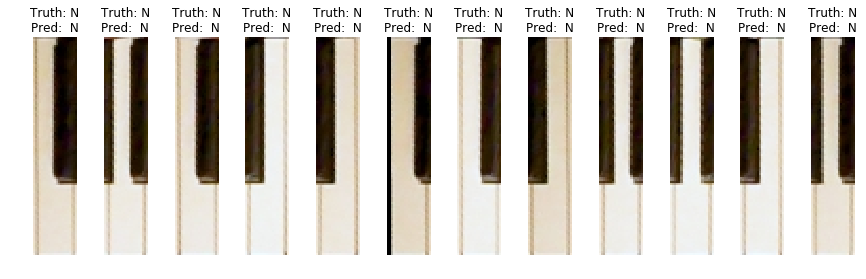

In [8]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb, _ in dataset.data_batch(type='test', size='single', color='white', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = wmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()